# Objective

I am using the dataset of a data science competition held by zindi.africa. This data is the actual data collected by the website of it's users and the objective of this competition is to create a machine learning model to determine if a user will be active on Zindi in the next month. An active user is one that enters a competition, makes a submission, or engages through the discussion forums. I have performed several statistical analysis and modeling to come up with an appropriate model that can predict user activity. 


# Data Info
###  The data is a subset of Zindi user activity. All variables have been masked to preserve privacy.
* **competitions.csv:** this file contains information about hackathons and competitions
* **CompetitionPartipation.csv:** this file contains information about users' participation in hackathons and competitions
* **comments.csv:** this file contains information about every comment made, such as which userID made the submission and when it was made
* **VariableDefinitions.csv:** this file contains information about each table and each variable
* **train.csv:** this is a summarized table of the above activities. You can use this table to train you model but it is recommended you pull features from the above tables to enrich your model.
* **test.csv:** contains the userID, month and year you need to apply your model to.
* **SampleSubmission.csz:** shows the submission format for this competition. The order of the rows does not matter, but the names of the ‘ID’ must be correct.

# Data Load and Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
comments = pd.read_csv('Comments.csv')
competitionPartipation = pd.read_csv('CompetitionPartipation.csv')
Discussions = pd.read_csv('Discussions.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
competitions = pd.read_csv('Competitions.csv')

**Looking at the comments table we can see that it has 44% duplicate values**

In [3]:
#Check Unique Values
comments.nunique(), print('Comments Number of Records:', len(comments))

Comments Number of Records: 11751


(UserID                     2055
 CommentDate Year              3
 CommentDate Month            12
 CommentDate Day_of_week       7
 dtype: int64,
 None)

In [4]:
print('Number of duplicate records are:',len(comments[comments.duplicated()])/len(comments) * 100)

Number of duplicate records are: 44.56641987915922


In [5]:
#Drop Duplicates
comments.drop_duplicates(keep='first', inplace = True)
comments.reset_index(inplace = True, drop = True)

In [6]:
#Check Duplicates
print('Number of duplicate records are:',len(comments[comments.duplicated()])/len(comments) * 100)

Number of duplicate records are: 0.0


In [7]:
comments

,UserID,CommentDate Year,CommentDate Month,CommentDate Day_of_week
0,ID_MVIB05DL,3,1,7
1,ID_KBRFRAR9,3,1,7
2,ID_UDS6FRR8,3,1,7
3,ID_M8Z5T722,3,1,7
4,ID_MVIB05DL,3,2,2
...,...,...,...,...
6509,ID_ZVE0W61X,3,12,2
6510,ID_9MJ12JJR,3,5,4
6511,ID_0B9SK73T,3,6,5
6512,ID_0B9SK73T,3,6,4


In [8]:
display(comments.head(), test.head())

,UserID,CommentDate Year,CommentDate Month,CommentDate Day_of_week
0,ID_MVIB05DL,3,1,7
1,ID_KBRFRAR9,3,1,7
2,ID_UDS6FRR8,3,1,7
3,ID_M8Z5T722,3,1,7
4,ID_MVIB05DL,3,2,2


,User_ID,month,year
0,ID_H1ELY25E,1,4
1,ID_H1ELY25E,2,4
2,ID_H1ELY25E,3,4
3,ID_463Q2BCO,1,4
4,ID_463Q2BCO,2,4


# We will join datasets to combine all the features to train our model.

**In order to join the train and comments table we will aggregate the columns in the comments table to create different statistics of the columns.  This will help us to reduce duplication by reducing the amount of data participating in joins.** 

In [9]:
def renamer(agg_func,desired_name):
    def return_func(x):
        return agg_func(x)
    return_func.__name__ = desired_name
    return return_func

In [10]:
comments1 = comments.groupby('UserID').agg({'CommentDate Month':[renamer(np.sum,'CommentMonth_Sum'),renamer(np.median,'CommentMonth_Median'),renamer(np.mean,'CommentMonth_Mean'),renamer(np.size,'CommentMonth_Count')],
                                           'CommentDate Year':[renamer(np.sum,'CommentYear_Sum'),renamer(np.median,'CommentYear_Median'),renamer(np.mean,'CommentYear_Mean'),renamer(np.size,'CommentYear_Count')],
                                           'CommentDate Day_of_week':[renamer(np.sum,'CommentDoW_Sum'),renamer(np.median,'CommentDoW_Median'),renamer(np.mean,'CommentDoW_Mean'),renamer(np.size,'CommentDoW_Count')]})

comments1.columns = comments1.columns.droplevel(level=0)

comments1 = comments1.reset_index()

In [11]:
comments1.head()

,UserID,CommentMonth_Sum,CommentMonth_Median,CommentMonth_Mean,CommentMonth_Count,CommentYear_Sum,CommentYear_Median,CommentYear_Mean,CommentYear_Count,CommentDoW_Sum,CommentDoW_Median,CommentDoW_Mean,CommentDoW_Count
0,ID_00HKNVC0,24,5.0,6.000000,4,12,3.0,3.0,4,18,5.0,4.500000,4
1,ID_00QSUS04,16,5.0,5.333333,3,6,2.0,2.0,3,10,3.0,3.333333,3
2,ID_00WD4BRD,6,6.0,6.000000,1,3,3.0,3.0,1,1,1.0,1.000000,1
3,ID_01SWZ6F1,4,4.0,4.000000,1,2,2.0,2.0,1,5,5.0,5.000000,1
4,ID_024JT34D,3,3.0,3.000000,1,2,2.0,2.0,1,7,7.0,7.000000,1


In [12]:
#shape of train before join
train.shape

(259832, 8)

In [13]:
result = pd.merge(train,
                  comments1,
                  left_on = ['User_ID'],
                  right_on= ['UserID'],
                  how ='left') 

In [14]:
#shape after join
result.shape

(259832, 21)

## Joining the competition tables
**As the table 'competitions' does not have the column UserID we will have to join it to 'competitionPartipation' first**

In [15]:
display(competitions, competitionPartipation)

,CompID,Country,FeatureA,FeatureB,FeatureC,Kind,Points Reward,FeatureD,SecretCode,SubmissionLimitPerDay,FeatureE,CompEndTime Year,CompEndTime Month,CompEndTime Day_of_week,CompStartTime Year,CompStartTime Month,CompStartTime Day_of_week
0,ID_WGZ2,ID_HWRH,[1],[14],1.0,1,27,1,0,100.0,[1],1,8.0,7.0,1,6,5
1,ID_G370,NaN,[1],[],2.0,1,52,2,0,10.0,[1],4,1.0,6.0,3,12,7
2,ID_R5HL,NaN,[1],[],3.0,1,126,2,0,10.0,[1],4,1.0,6.0,3,10,4
3,ID_Y6XI,ID_ARVG,[1],[],4.0,1,52,2,0,10.0,[1],4,1.0,6.0,3,11,4
4,ID_8PEN,ID_I1L9,[1],[],5.0,0,2,2,0,200.0,[1],2,11.0,6.0,2,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,ID_F7X4,NaN,[1],[],2.0,1,2,3,0,30.0,[1],not mapped,NaN,NaN,1,5,3
150,ID_E1LI,ID_I1L9,"[3, 2]",[14],7.0,1,2,3,0,50.0,[2],not mapped,NaN,NaN,3,2,3
151,ID_MPSN,NaN,[1],[9],2.0,1,2,3,0,10.0,"[1, 5]",not mapped,NaN,NaN,2,2,7
152,ID_Z5QP,ID_5OWN,[1],[],31.0,0,2,2,1,NaN,[1],3,6.0,5.0,3,6,5


,CompID,UserID,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,CompPartCreated Day_of_week
0,ID_WMUF,ID_UWBBZ9OF,rank 11,count 10,3,1,4
1,ID_MPSN,ID_UWBBZ9OF,NaN,NaN,3,1,7
2,ID_WMUF,ID_1N5J2PGO,NaN,count 10,3,1,5
3,ID_7MLO,ID_1N5J2PGO,NaN,NaN,2,10,5
4,ID_2KEY,ID_1N5J2PGO,NaN,NaN,2,5,4
...,...,...,...,...,...,...,...
48560,ID_XYJZ,ID_5C4D0VO2,rank 11,count 10,3,7,6
48561,ID_XYJZ,ID_JRJZQB8S,rank 11,count 10,3,7,5
48562,ID_XYJZ,ID_H4FM7RBV,NaN,NaN,3,7,5
48563,ID_XYJZ,ID_C3QOEMU4,rank 11,count 10,3,7,5


In [16]:
result_comp = pd.merge(competitionPartipation,
                  competitions,
                  left_on = ['CompID'],
                  right_on= ['CompID'],
                  how ='left')

In [17]:
#Function to check null values
def assess_NA(data):
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [18]:
df_na = assess_NA(result_comp)
df_na

,Number of NA,Percent NA
PublicRank,34598,71.24
Successful Submission Count,32426,66.77
CompEndTime Day_of_week,9182,18.91
CompEndTime Month,9182,18.91
Country,8412,17.32
FeatureC,4021,8.28
SubmissionLimitPerDay,712,1.47


# Feature Engineering and Analysis

### Public Rank
This variable is split into groups. Users are grouped together in groups of 50.  Rank 1 does not neccesarily mean the users who are top 50 on the leaderboard. This field is masked.

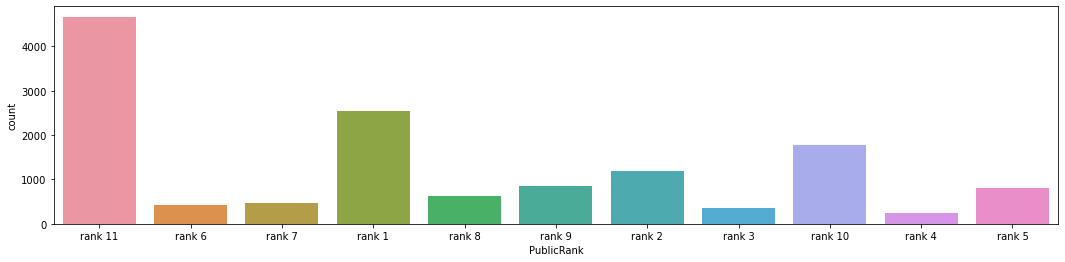

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
sns.countplot(data = result_comp, x = 'PublicRank')
plt.show()

In [20]:
result_comp['PublicRank'].fillna('rank na', inplace = True)

We can see that the ranks are not in chronological order. People with rank 6 have the highest points followed by rank 7 and 2. We can rearrange rank according to Points Rewarded and aggregate it before joining.

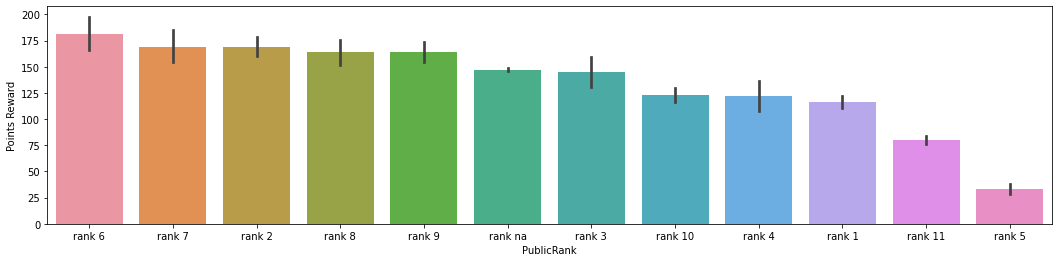

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
sns.barplot(x = 'PublicRank', y = 'Points Reward',data = result_comp, order = ['rank 6','rank 7','rank 2','rank 8','rank 9','rank na','rank 3','rank 10','rank 4','rank 1','rank 11','rank 5'])
plt.show()

In [22]:
result_comp['PublicRank'].value_counts(normalize = True) * 100

rank na    71.240605
rank 11     9.613919
rank 1      5.244518
rank 10     3.659014
rank 2      2.460620
rank 9      1.748173
rank 5      1.643159
rank 8      1.313703
rank 7      0.988366
rank 6      0.862761
rank 3      0.720684
rank 4      0.504479
Name: PublicRank, dtype: float64

In [23]:
dict1 = {'rank 6':1, 
         'rank 7':2,
         'rank 2':3,
         'rank 8':4,
         'rank 9':5,
         'rank 3':6,
         'rank 10':7,
         'rank 4':8,
         'rank 1':9,
         'rank 11':10,
         'rank 5':11,
         'rank na': -999
        } 
result_comp['PublicRank'] = result_comp['PublicRank'].map(dict1)

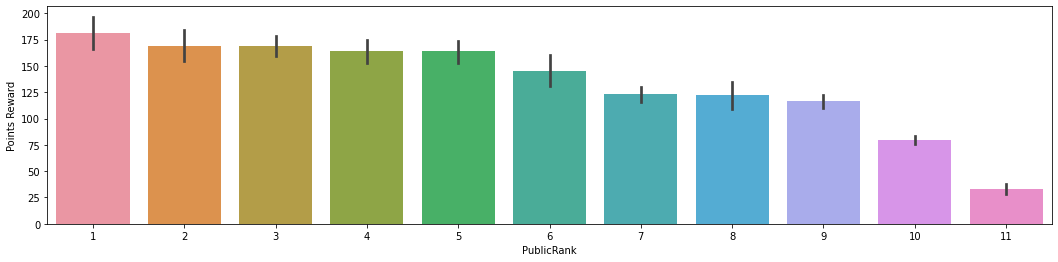

In [24]:
plt.figure(figsize=(18,4))
sns.barplot(x = 'PublicRank', y = 'Points Reward',data = result_comp, order = [1,2,3,4,5,6,7,8,9,10,11])
plt.show()

We have to predict the user activity in the future so we will also create a feature by frequency encoding the rank. So our model will know if the rank is null in the future for a certain value of other features.

In [25]:
pr = result_comp['PublicRank'].value_counts()/len(result_comp['PublicRank'])
pr = pr.to_dict()
result_comp['PublicRank_Freq'] = result_comp['PublicRank'].map(pr) 

### Secret Code
Secret Code is a special code someone has to enter a competition. We can see that very few people have the special code. We can calculate the sum of the secret code for number of people in the aggregate function to get a measure of how many people have a code.

<AxesSubplot:xlabel='SecretCode', ylabel='count'>

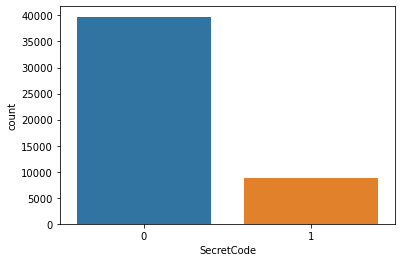

In [26]:
sns.countplot(data = result_comp, x = 'SecretCode')

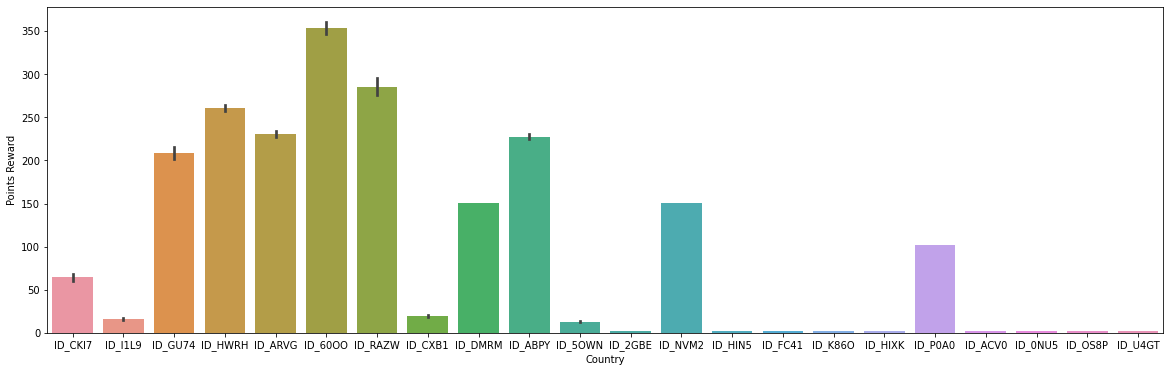

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.barplot(x = 'Country', y = 'Points Reward',data = result_comp)
plt.show()

### Successful Submission Count
This variable is split into groups. Number of submissions are grouped in groups of 10. Count 3 does not neccesarily mean that users with count 3 made 30-40 submissions. This field is masked

In [1672]:
result_comp['Successful Submission Count'].fillna('count 0', inplace = True)

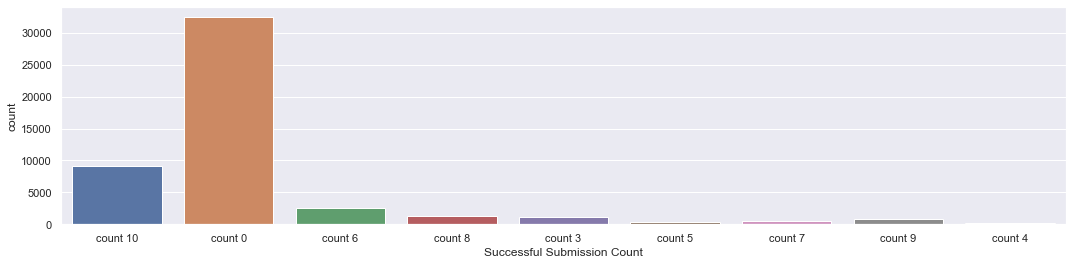

In [1673]:
plt.figure(figsize=(18,4))
sns.countplot(data = result_comp, x = 'Successful Submission Count')
plt.show()

As we have to predict user activity we will create a feature of frequency of occeunce of submission counts. 

In [1678]:
result_comp['Successful Submission Count'].replace(0,-999, inplace = True)

In [1679]:
sc = result_comp['Successful Submission Count'].value_counts()/len(result_comp['Successful Submission Count'])
sc = sc.to_dict()
result_comp['Successful Submission Count_Freq'] = result_comp['Successful Submission Count'].map(sc)

In [1681]:
result_comp[['Successful Submission Count_Freq']].head(10)

,Successful Submission Count_Freq
0,0.189210
1,0.667682
2,0.189210
3,0.667682
4,0.667682
5,0.667682
6,0.667682
7,0.189210
8,0.667682
9,0.667682


### Features
A category the competition falls into. This field is masked.

In [1682]:
result_comp[['FeatureA','FeatureB','FeatureC','FeatureD','FeatureE']]

,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE
0,"[3, 2]",[],6.0,2,[2]
1,[1],[9],2.0,3,"[1, 5]"
2,"[3, 2]",[],6.0,2,[2]
3,[1],[],30.0,2,[1]
4,[1],[],37.0,2,[1]
...,...,...,...,...,...
48560,[1],[],35.0,2,[1]
48561,[1],[],35.0,2,[1]
48562,[1],[],35.0,2,[1]
48563,[1],[],35.0,2,[1]


In [1683]:
result_comp['FeatureC'].fillna(result_comp['FeatureC'].mode()[0], inplace = True)

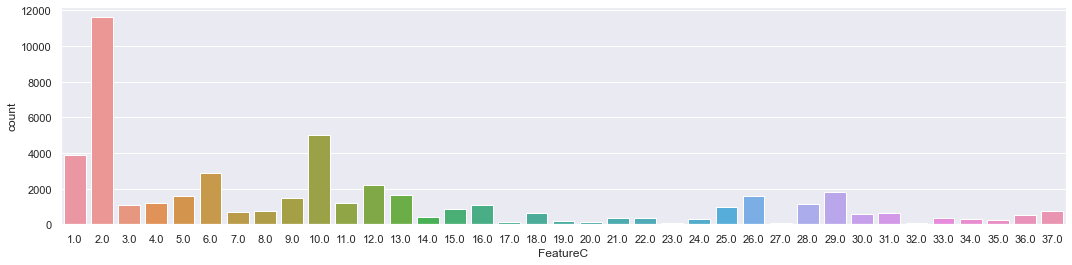

In [1684]:
plt.figure(figsize=(18,4))
sns.countplot(data = result_comp, x = 'FeatureC')
plt.show()

* Feature C is a categorical variable but has continuous values. Due to the high dimenstionality of Feature C we will use binary encoding to encode  feature a,b,c,e. 

* **Binary encoding -** Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.
It works well when there are high number of categories. Like in the case of Feature C.



In [1685]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols = ['FeatureA', 'FeatureB', 'FeatureE', 'FeatureC', 'FeatureD'],return_df=True)
result_comp = encoder.fit_transform(result_comp)

### Comp Time
These features give us the day,year and month of when the competition started and ended

In [1686]:
#Check Null values
df_na = assess_NA(result_comp)
df_na

,Number of NA,Percent NA
CompEndTime Day_of_week,9182,18.91
CompEndTime Month,9182,18.91
Country,8412,17.32
SubmissionLimitPerDay,712,1.47


In [1687]:
result_comp['CompEndTime Day_of_week'].fillna(result_comp['CompEndTime Day_of_week'].mean(), inplace = True)
result_comp['CompEndTime Month'].fillna(result_comp['CompEndTime Month'].mean(), inplace = True)


In [1688]:
result_comp['CompEndTime Year'].value_counts()

3             19716
2             15284
not mapped     9182
4              2437
1              1946
Name: CompEndTime Year, dtype: int64

**Created features from competition start and end time that record competition duration.**

In [1689]:
result_comp['CompEndTime Year'].replace('not mapped', 2.5, inplace=True)

In [1690]:
result_comp['CompEndTime Year'] = result_comp['CompEndTime Year'].astype(int)
result_comp['Comp_Duration Year'] = result_comp['CompEndTime Year'] - result_comp['CompStartTime Year'] 
result_comp['Comp_Duration Year'].replace(-1, 6, inplace=True)

In [33]:
result_comp['CompDuration Month'] = result_comp['CompEndTime Month'] - result_comp['CompStartTime Month'] 
result_comp['CompDuration Month'] = np.where(result_comp['CompDuration Month'] < 0, 12 + result_comp['CompDuration Month'], result_comp['CompDuration Month'])

In [34]:
result_comp['CompDuration Day'] = result_comp['CompEndTime Day_of_week'] - result_comp['CompStartTime Day_of_week']
result_comp['CompDuration Day'] = np.where(result_comp['CompDuration Day'] < 0, 7 + result_comp['CompDuration Day'], result_comp['CompDuration Day'])

In [1693]:
result_comp.drop(['CompEndTime Month', 'CompStartTime Month', 'CompEndTime Day_of_week', 'CompStartTime Day_of_week'], axis = 1, inplace = True)

### Submission Limit Per Day
Number of submissions per day limit per competition

In [1694]:
result_comp[['SubmissionLimitPerDay', 'Successful Submission Count']]

,SubmissionLimitPerDay,Successful Submission Count
0,30.0,10
1,10.0,-999
2,30.0,10
3,200.0,-999
4,30.0,-999
...,...,...
48560,50.0,10
48561,50.0,10
48562,50.0,-999
48563,50.0,10


In [1695]:
result_comp['SubmissionLimitPerDay'].value_counts()


30.0     22815
10.0     12811
100.0     4007
200.0     3052
5.0       2337
20.0      1136
50.0      1002
4.0        593
65.0       100
Name: SubmissionLimitPerDay, dtype: int64

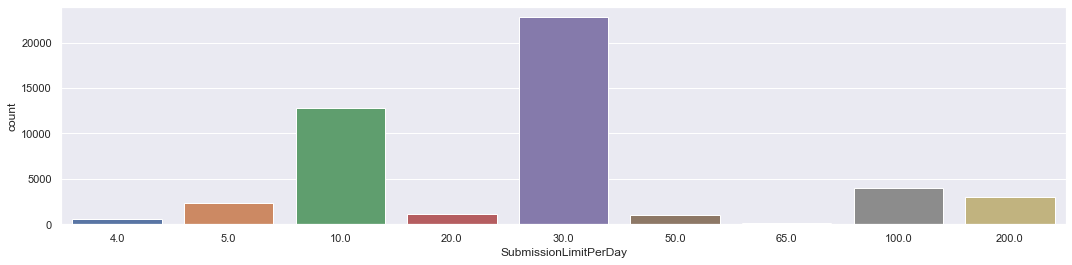

In [1696]:
plt.figure(figsize=(18,4))
sns.countplot(data = result_comp, x = 'SubmissionLimitPerDay')
plt.show()

In [1697]:
result_comp['SubmissionLimitPerDay'].fillna(result_comp['SubmissionLimitPerDay'].mean(), inplace = True)

### Country and Comp ID
* Competition ID - his is the ID of the competition or hackathon
* Country -  Competition host is from or where hackathon is being hosted

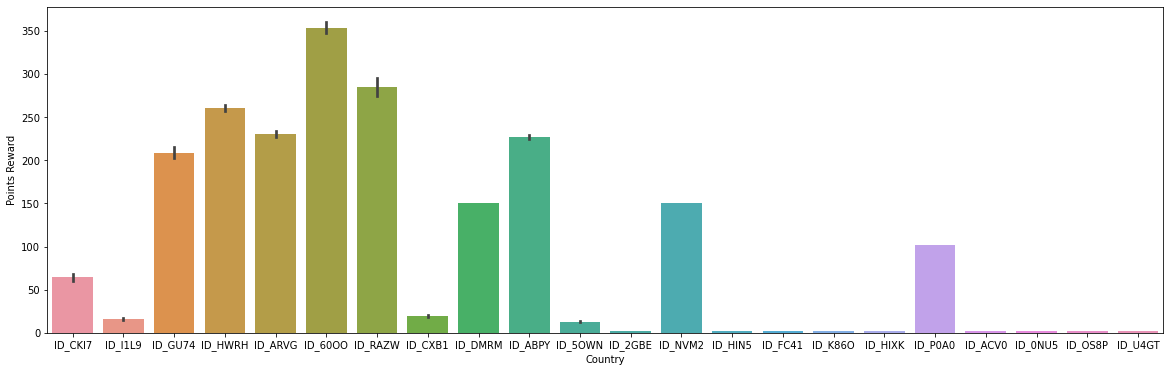

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.barplot(x = 'Country', y = 'Points Reward',data = result_comp)
plt.show()

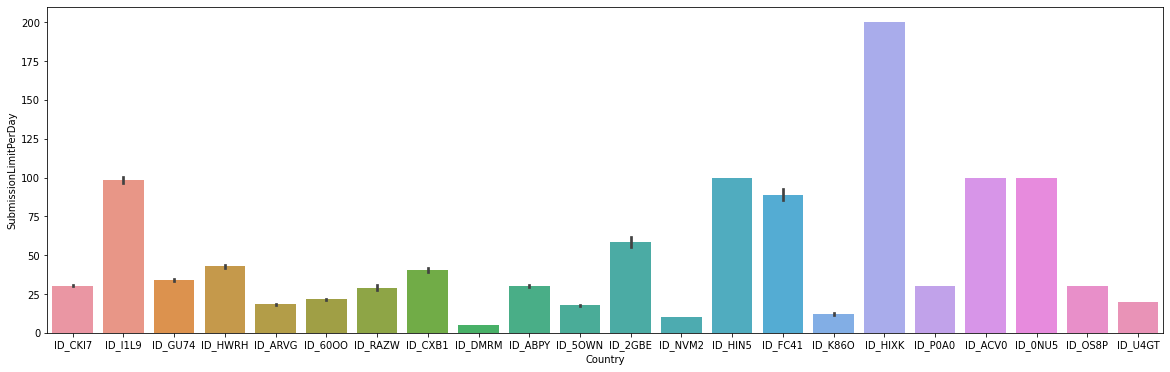

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.barplot(x = 'Country', y = 'SubmissionLimitPerDay',data = result_comp)
plt.show()


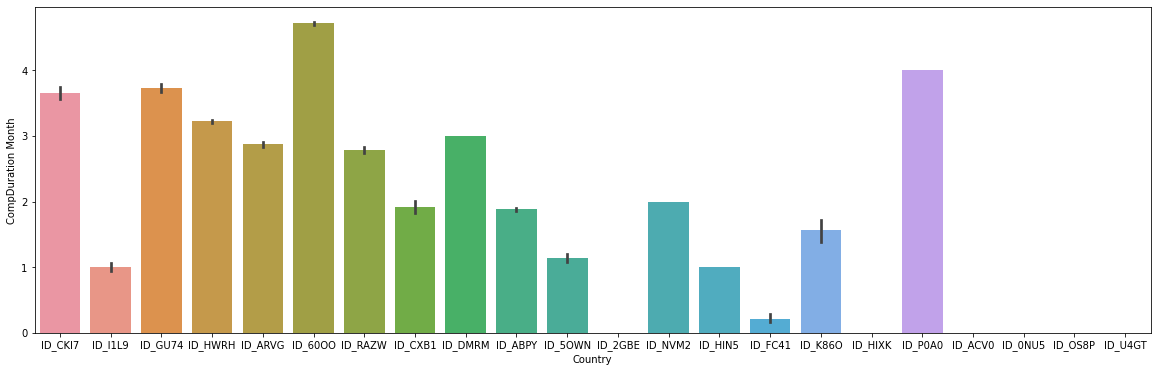

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.barplot(x = 'Country', y = 'CompDuration Month',data = result_comp)
plt.show()

* We can see from the graphs how contries are related to points rewarded, submission limits and competition durations.
* We can see relationships like countries where competition duration is more, submission limit is less as the user get's more time to work on his submission. 
* In order to capture these relationships we will perform one hot encoding on the contries column and we will find out the sum of the one hot encoded columns to preserve its relationship with other features.

In [1701]:
one_hot = pd.get_dummies(result_comp['Country'])
result_comp.drop('Country',axis = 1, inplace= True)

In [1702]:
result_comp = result_comp.join(one_hot)

* As CompID has high dimensionality we will use base encoding to encode its values.
* For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form. If you want to change the Base of encoding scheme you may use Base N encoder. In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

In [1703]:
result_comp['CompID'].nunique()

137

In [1704]:
import category_encoders as ce
encoder1= ce.BaseNEncoder(return_df=True,base=2)
enc1 = encoder1.fit_transform(result_comp['CompID'])
result_comp.drop('CompID',axis = 1, inplace= True)
result_comp = result_comp.join(enc1)

### Now we will aggregate the rows according to the analysis done, and join our table to our originial dataset.

In [1705]:
result_comp.columns

Index(['UserID', 'PublicRank', 'Successful Submission Count',
       'CompPartCreated Year', 'CompPartCreated Month',
       'CompPartCreated Day_of_week', 'FeatureA_0', 'FeatureA_1', 'FeatureA_2',
       'FeatureA_3', 'FeatureA_4', 'FeatureB_0', 'FeatureB_1', 'FeatureB_2',
       'FeatureB_3', 'FeatureC_0', 'FeatureC_1', 'FeatureC_2', 'FeatureC_3',
       'FeatureC_4', 'FeatureC_5', 'Kind', 'Points Reward', 'FeatureD_0',
       'FeatureD_1', 'SecretCode', 'SubmissionLimitPerDay', 'FeatureE_0',
       'FeatureE_1', 'FeatureE_2', 'FeatureE_3', 'FeatureE_4',
       'CompEndTime Year', 'CompStartTime Year', 'PublicRank_Freq',
       'Successful Submission Count_Freq', 'Comp_Duration Year',
       'CompDuration Month', 'CompDuration Day', 'ID_0NU5', 'ID_2GBE',
       'ID_5OWN', 'ID_60OO', 'ID_ABPY', 'ID_ACV0', 'ID_ARVG', 'ID_CKI7',
       'ID_CXB1', 'ID_DMRM', 'ID_FC41', 'ID_GU74', 'ID_HIN5', 'ID_HIXK',
       'ID_HWRH', 'ID_I1L9', 'ID_K86O', 'ID_NVM2', 'ID_OS8P', 'ID_P0A0',
       'ID_RAZ

In [1706]:
result_comp_final = result_comp.groupby(['UserID']).agg({'PublicRank':[renamer(np.size,'PublicRank_Count')],
                                           'PublicRank_Freq':[renamer(np.mean,'PublicRank_Freq')],
                                           'Successful Submission Count':[renamer(np.size,'Successful Submission Count_Size')],
                                           'Successful Submission Count_Freq':[renamer(np.mean,'Successful Submission Count_Freq')],
                                           'Comp_Duration Year':[renamer(np.mean,'CompDuration Year_Mean')],
                                           'CompDuration Month':[renamer(np.mean,'Comp_Duration Month_Mean')],
                                           'CompDuration Day':[renamer(np.mean,'CompDuration Day_Mean')],
                                           'CompEndTime Year':[renamer(np.sum,'CompEndTime Year')],
                                           'CompStartTime Year':[renamer(np.mean,'CompStartTime Year_Mean')],
                                           'FeatureA_0':[renamer(np.sum,'FeatureA_0')],
                                           'FeatureA_1':[renamer(np.sum,'FeatureA_1')],
                                           'FeatureA_2':[renamer(np.sum,'FeatureA_2')],
                                           'FeatureA_3':[renamer(np.sum,'FeatureA_3')],
                                           'FeatureA_4':[renamer(np.sum,'FeatureA_4')],
                                           'FeatureB_0':[renamer(np.sum,'FeatureB_0')],
                                           'FeatureB_1':[renamer(np.sum,'FeatureB_1')],
                                           'FeatureB_2':[renamer(np.sum,'FeatureB_2')],
                                           'FeatureB_3':[renamer(np.sum,'FeatureB_3')],
                                           'FeatureC_0':[renamer(np.sum,'FeatureC_0')],
                                           'FeatureC_1':[renamer(np.sum,'FeatureC_1')],
                                           'FeatureC_2':[renamer(np.sum,'FeatureC_2')],
                                           'FeatureC_3':[renamer(np.sum,'FeatureC_3')],
                                           'FeatureC_4':[renamer(np.sum,'FeatureC_4')],
                                           'FeatureC_5':[renamer(np.sum,'FeatureC_5')],
                                           'Kind':[renamer(lambda x: pd.Series.mode(x)[0],'Kind')],
                                           'Points Reward':[renamer(np.mean,'Points Reward')],
                                           'FeatureD_0':[renamer(np.mean,'FeatureD_0')],
                                           'FeatureD_1':[renamer(np.mean,'FeatureD_1')],
                                           'FeatureE_0':[renamer(np.sum,'FeatureE_0')],
                                           'FeatureE_1':[renamer(np.sum,'FeatureE_1')],
                                           'FeatureE_2':[renamer(np.sum,'FeatureE_2')],
                                           'FeatureE_3':[renamer(np.sum,'FeatureE_3')],
                                           'FeatureE_4':[renamer(np.sum,'FeatureE_4')],
                                           'CompID_0':[renamer(np.sum,'CompID_0')],
                                           'CompID_1':[renamer(np.sum,'CompID_1')],
                                           'CompID_2':[renamer(np.sum,'CompID_2')],
                                           'CompID_3':[renamer(np.sum,'CompID_3')],
                                           'CompID_4':[renamer(np.sum,'CompID_4')],
                                           'CompID_5':[renamer(np.sum,'CompID_5')],
                                           'CompID_6':[renamer(np.sum,'CompID_6')],
                                           'CompID_7':[renamer(np.sum,'CompID_7')] ,            
                                           'SecretCode':[renamer(np.sum,'SecretCode')]

                                                                                                       
                                                    })
result_comp_final.columns = result_comp_final.columns.droplevel(level=0)

result_comp_final = result_comp_final.reset_index()



### Join the previously joined train and comment table with the competition tables joined.

In [1707]:
result_train = pd.merge(result,
                  result_comp_final,
                  left_on = ['User_ID'],
                  right_on= ['UserID'],
                  how ='left')

In [1708]:
#Check Null values
df_na = assess_NA(result_train)
df_na

,Number of NA,Percent NA
CommentDoW_Mean,225989,86.98
CommentMonth_Median,225989,86.98
CommentDoW_Count,225989,86.98
CommentDoW_Median,225989,86.98
CommentDoW_Sum,225989,86.98
CommentYear_Count,225989,86.98
CommentYear_Mean,225989,86.98
CommentYear_Median,225989,86.98
CommentYear_Sum,225989,86.98
CommentMonth_Mean,225989,86.98


**We can see that 86% values in the comment table are null. This is because very few users have commented on the website. In order capture this behaviour we will create a new feature to record when a user has commented and when he has not.**

In [1709]:
result_train.drop(['CompPart','Comment','Sub', 'Disc'], axis = 1 ,inplace=True)
result_train.drop(['UserID_x','UserID_y'], axis = 1 ,inplace=True)
result_train['Comments'] = np.where((result_train['CommentMonth_Sum'].isnull()) & 
                                    (result_train['CommentMonth_Median'].isnull()) &
                                    (result_train['CommentMonth_Mean'].isnull()) &
                                    (result_train['CommentMonth_Count'].isnull()) &
                                    (result_train['CommentYear_Mean'].isnull()) &
                                    (result_train['CommentYear_Median'].isnull()) &
                                    (result_train['CommentYear_Sum'].isnull()) &
                                    (result_train['CommentYear_Count'].isnull()) &
                                    (result_train['CommentDoW_Sum'].isnull()) &
                                    (result_train['CommentDoW_Median'].isnull()) &
                                    (result_train['CommentDoW_Mean'].isnull()) &
                                    (result_train['CommentDoW_Count'].isnull()), 0,1)

In [1710]:
#We will fill the nulll values with zero as a null value means user hasn't commented
cols = list(comments1.columns[1:])
result_train[cols] = result_train[cols].fillna(0)

In [1711]:
result_train.fillna(-999, inplace = True)

**We will check the correlation of the columns of our dataset with the target variable too see if any column is highly correlated(can be dropped)**

In [1712]:
#Check correlation
corr_matrix = result_train.corr().abs()
print(corr_matrix['Target'].sort_values(ascending=False).head(10))

Target                1.000000
CommentYear_Median    0.224069
CommentYear_Mean      0.223179
Comments              0.211280
CommentYear_Sum       0.199691
CommentDoW_Sum        0.198604
CommentMonth_Count    0.198073
CommentYear_Count     0.198073
CommentDoW_Count      0.198073
CommentMonth_Mean     0.197110
Name: Target, dtype: float64


# We will now train our baseline model. 

* **For Training the model I devided the data into a trainset and holdout test set.**



In [1717]:
from sklearn.model_selection import train_test_split
x = result_train.drop('Target', axis = 1)
y = result_train['Target']
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.33, random_state=42)

## Evaluation Metric

### ROC AUC Score- 
* It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.It can be shown that ROC AUC score is equivalent to calculating the rank correlation between predictions and targets. 
* From an interpretation standpoint, it is more useful because it tells us that this metric shows how good at ranking predictions your model is. It tells you what is the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.

### Why we use roc_auc in our model as an evaluation metric:

* We care about ranking predictions (How likely is it that the user is active in the future).
 
* Our data is not heavily imbalanced as in heavily imbalanced the data the true negatives would pull down the false positives.
 
* We care about true negatives as much as we care about true positives (We equally likely need to know if a user is active or inactive in the future).

In [1718]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib as plt
rf = RandomForestClassifier()

## Cross Validation Strategy (Stratified Group K fold)
* Stratification will enforce the class distribution in each **split of the data to match the distribution in the complete training dataset**.
* **StratifiedGroupKFold** attempts to create folds which maintains the percentage of samples of each class** while making sure that there are **equal number of distinct groups** in each fold.


In [1737]:
from sklearn.model_selection import StratifiedGroupKFold
cv = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 4)

In [1738]:
groups = x1_train['User_ID']
i = 1
aucs = []
for train_index,test_index in cv.split(x1_train,y1_train,groups):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    x_train  = x_train.drop(['User_ID'], axis = 1)
    x_test  = x_test.drop(['User_ID'], axis = 1)
    rf.fit(x_train, y_train)
    rf_probs = rf.predict_proba(x_test)
    aucscore = roc_auc_score(y_test, rf_probs[:,1])
    aucs.append(aucscore)
print("AUC Score:", np.mean(aucs))

AUC Score: 0.8970177650389154


**Check model on hold out test set**


In [1739]:
xq = x1_test.drop(['User_ID'], axis = 1)
rfp = rf.predict_proba(xq)[:,1]
print('Hold Out Set Value is:',roc_auc_score(y1_test,rfp))

Hold Out Set Value is: 0.9219297124872639


**By checking the lineplot of the accuracy change perfold, we can inder whether the model is overfitting orunderfitting. If there is huge variation in the accuracy per fold, we can say that model is overfitting. As it will not generalize well.** 

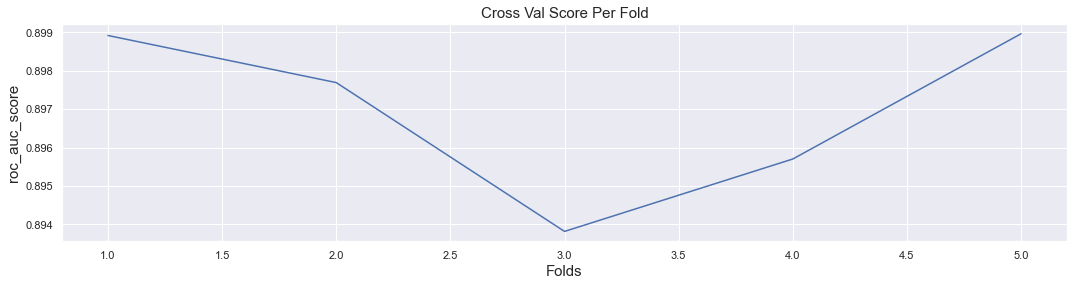

In [1740]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,4))
sns.set_theme(style="darkgrid")
p = sns.lineplot(x=[i+1 for i in range(len(aucs))],y=aucs[::-1])
p.set_xlabel("Folds", fontsize = 15)
p.set_ylabel("roc_auc_score", fontsize = 15)
plt.title("Cross Val Score Per Fold", fontsize = 15)
plt.show()

## Why we use the probability of our data points belonging to a class rather than the prediction of the acutal class for the ROC Curve

The ROC curve **shows how sensitivity and specificity varies at every possible threshold**. Binary predictions, where **predictions have been thresholded already**, or a contingency table, have lost information about the other thresholds. Therefore you can't calculate the ROC curve from this summarized data.

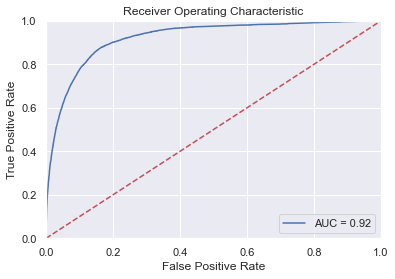

In [1741]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(xq)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameter Tuning
* Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm

* **RandomSearchCV**- Random search is a technique where **random combinations of the hyperparameters** are used to find the best solution for the built model. In this search pattern, the random combinations of parameters considered in every iteration **increase the chances of finding the optimal parameter** as compared to other techniques as the **model might end up being trained on the optimised parameters** without any aliasing. 


In [1726]:
from sklearn.model_selection import StratifiedGroupKFold

cv1 = StratifiedGroupKFold(n_splits=5, shuffle = True, random_state = 4)
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [1727]:
x1_train.drop(['User_ID'], axis = 1, inplace = True)

In [832]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = cv1, verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')
# Fit the random search model

rf_random.fit(x1_train, y1_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/U

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=13.4min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=13.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=13.9min
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=13.2min


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/U

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=13.9min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=13.7min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=13.9min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=13.7min


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/U

RandomizedSearchCV(cv=StratifiedGroupKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='roc_auc', verbose=2)

**Parameters optimized:**
* **n_estimaors** - This is the **number of trees you want to build before taking averages of predictions**. Higher number of trees give you better performance but makes your code slower.
* **min_samples_split** - This **specifies the minimum number of samples required to split an internal node**. For instance, if min_samples_split = 5 , and there are 7 samples at an internal node, then the split is allowed.
* **min_samples_leaf** - This **guarantees a minimum number of samples in a leaf**.
* **max_features** - These are the **maximum number of features Random Forest is allowed to try in individual tree**. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree.
* **max_depth** - The max_depth of a tree in Random Forest is defined as the **longest path between the root node and the leaf node**. Using the max_depth parameter, I can limit up to what depth I want every tree in my random forest to grow.
* **bootstrap** - Bootstrapping is a statistical resampling technique that involves **random sampling of a dataset with replacement.**

In [837]:
rf_random.best_params_,rf_random.best_score_ 

({'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 50,
  'bootstrap': True},
 nan)

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time= 1.9min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=13.4min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=13.7min
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 5.8min


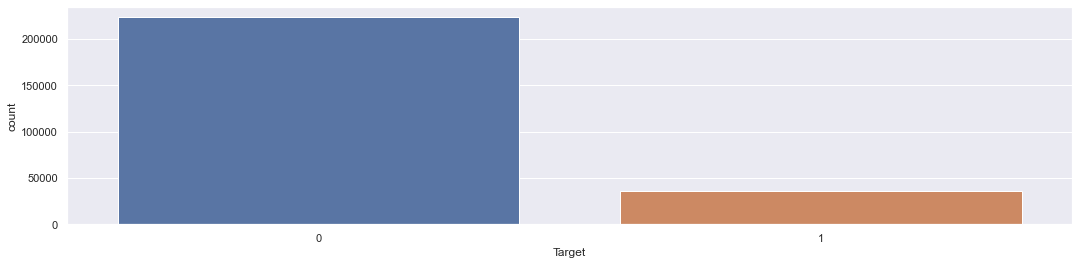

In [1728]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,4))
sns.countplot(data = result_train, x = 'Target')
plt.show()

## Imbalanced Data
**The model is overfitting as we are training our model on imbalanced data. In order to get better accuracy we should take care of the imbalance.**
* Since the RF seems to be biased towards the majority classs, we shall place a heavier penalty on missclassifying the minority class. 
* We assign a weight to each class, with the minority class given larger weight (i.e., higher misclassification cost). 
* We can adjust threshold to get better classification.

In [1742]:
x = result_train.drop('Target', axis = 1)
y = result_train['Target']
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [1743]:
from sklearn.utils import compute_class_weight
#Calculate class weights
class_weights = compute_class_weight( class_weight = "balanced",
                                        classes = np.unique(y1_train),
                                        y = y1_train)

In [1744]:
class_weights

array([0.58121219, 3.5783556 ])

In [1745]:
weight = {0 : 0.58121219, 1 : 3.5783556 }

In [1746]:
#Assign calculated weights along with the hyperparameters.
rf = RandomForestClassifier(n_estimators = 200,
  min_samples_split = 10,
  min_samples_leaf= 2,
  max_features= 'sqrt',
  max_depth= 50,
  class_weight= weight,                       
  bootstrap= True)

We can see that there is a slight increase in accuracy after hyperparameter tuning

In [1747]:
for train_index,test_index in cv.split(x1_train,y1_train,groups):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    x_train  = x_train.drop(['User_ID'], axis = 1)
    x_test  = x_test.drop(['User_ID'], axis = 1)
    rf.fit(x_train, y_train)
    rf_probs = rf.predict_proba(x_test)[:,1]
    aucscore = roc_auc_score(y_test, rf_probs)
    aucs.append(aucscore)
print("AUC Score:", np.mean(aucs))

AUC Score: 0.8970417153767842


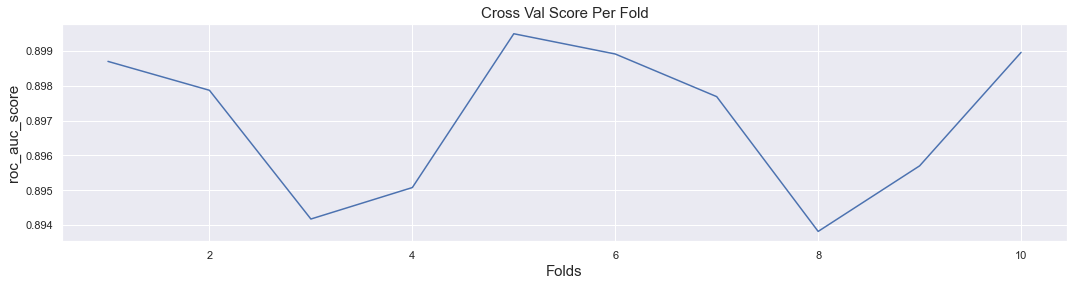

In [1748]:
plt.figure(figsize=(18,4))
sns.set_theme(style="darkgrid")
p = sns.lineplot(x=[i+1 for i in range(len(aucs))],y=aucs[::-1])
p.set_xlabel("Folds", fontsize = 15)
p.set_ylabel("roc_auc_score", fontsize = 15)
plt.title("Cross Val Score Per Fold", fontsize = 15)
plt.show()

In [1751]:
xq = x1_test.drop(['User_ID'], axis = 1)
rfp = rf.predict_proba(xq)[:,1]
print('Hold Out Set Value is:',roc_auc_score(y1_test,rfp))

Hold Out Set Value is: 0.9216395255378343


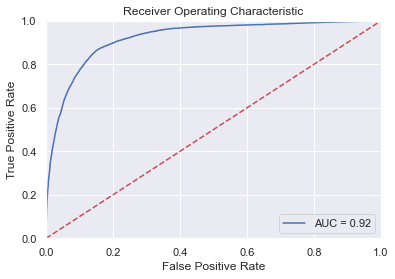

In [1752]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(xq)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Baseline model to make the prediction of the actual class of the data point directly.

* Till now we have been predicting the **probability of a data point belonging in a particular class**. Now we will make a **binary prediction of whether it belongs to a class or not**. 
* We will do this as it will help us see how our results change after **adjusting threhold.**
* The baseline model has a **default threshold of 0.5.**
* We use **model.predict instead of model.predict_proba.**

In [1753]:
# we use model.predict instead of model.predict_proba
for train_index,test_index in cv.split(x1_train,y1_train,groups):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    x_train  = x_train.drop(['User_ID'], axis = 1)
    x_test  = x_test.drop(['User_ID'], axis = 1)
    rf.fit(x_train, y_train)
    rf_probs = rf.predict(x_test)
    aucscore = roc_auc_score(y_test, rf_probs)
    aucs.append(aucscore)
print("AUC Score:", np.mean(aucs))

AUC Score: 0.8613896878892052


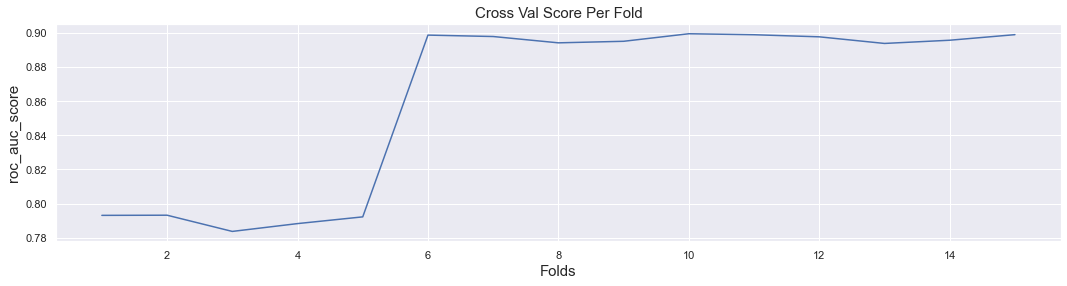

In [1754]:
plt.figure(figsize=(18,4))
sns.set_theme(style="darkgrid")
p = sns.lineplot(x=[i+1 for i in range(len(aucs))],y=aucs[::-1])
p.set_xlabel("Folds", fontsize = 15)
p.set_ylabel("roc_auc_score", fontsize = 15)
plt.title("Cross Val Score Per Fold", fontsize = 15)
plt.show()

In [1757]:
rfp = rf.predict(xq)
rfp = pd.DataFrame(rfp)
print('Baseline Value when threshold is (0.5):',roc_auc_score(y1_test,rfp))

Baseline Value when threshold is (0.5): 0.8387145981652773


## Set Threshold
* Using Auc_Roc as a metric to our classification model allows us to **evaluate the prediction of the actual class of the data point directly or predict its probability of belonging to different classes**. The latter gives us more control over the result. We can **determine our own threshold to interpret the result of the classifier**. This is sometimes more prudent than just building a completely new model!
* We will set a threshold to **adjust the sensitivity and specifity** of the model to check how the model is performing.

In [1758]:
pred = []
for i in np.linspace(0.1, 0.4, num=10): 
    rfp = rf.predict_proba(xq)[:,1]
    rfp = np.where(rfp>i,1,0)
    pred.append(roc_auc_score(y1_test,rfp))

In [1759]:
thresh_acc = pd.DataFrame(data = pred, columns = ['ROC_AUC_Score'])

In [1760]:
thresh_acc['Thresholds'] = np.linspace(0.1, 0.4, num=10)

In [1761]:
thresh_acc.sort_values(by='ROC_AUC_Score', ascending=False)

,ROC_AUC_Score,Thresholds
9,0.855168,0.400000
8,0.852277,0.366667
7,0.847566,0.333333
6,0.840630,0.300000
5,0.833349,0.266667
4,0.823221,0.233333
3,0.812391,0.200000
2,0.801200,0.166667
1,0.788109,0.133333
0,0.772385,0.100000


In [1762]:
rfp = rf.predict_proba(xq)[:,1]
rfp = pd.DataFrame(rfp)
rfp = np.where(rfp>0.4,1,0)

### We can see that using the suitable threshold gives us a better classification value as compared to our baseline value.

In [1763]:
print('Value after setting threshold(0.4) :',roc_auc_score(y1_test,rfp))

Value after setting threshold(0.4) : 0.8551677730290573


# Check Other Model and Compare with Original Model


In [1764]:
from xgboost import XGBClassifier
xgb_f = XGBClassifier(scale_pos_weight = 1)

In [1765]:
groups = x1_train['User_ID']
i = 1
aucs_xgb = []
for train_index,test_index in cv.split(x1_train,y1_train,groups):
    x_train, x_test, y_train, y_test = x1_train.iloc[train_index], x1_train.iloc[test_index], y1_train.iloc[train_index], y1_train.iloc[test_index]
    x_train  = x_train.drop(['User_ID'], axis = 1)
    x_test  = x_test.drop(['User_ID'], axis = 1)
    xgb_f.fit(x_train, y_train)
    xgb_probs = xgb_f.predict_proba(x_test)[:,1]
    aucscore_xgb = roc_auc_score(y_test, xgb_probs)
    aucs_xgb.append(aucscore_xgb)
print("AUC Score:", np.mean(aucs_xgb))

/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/haripurnapatre/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC Score: 0.9178923032933989


In [1766]:
rfp = xgb_f.predict_proba(xq)[:,1]
print('Hold Out Set Value is:',roc_auc_score(y1_test,rfp))

Hold Out Set Value is: 0.9176402796239104


* **We can see from the graph that the area under the curve for our random forest model (in black) is slightly more than the area under the curve for the xgboost model (in red).** 
* **So we can say random forest is a better classifier for our problem.**

/var/folders/y9/f2nfs3n574jc1n364wv_lbcw0000gn/T/ipykernel_65313/1584678778.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1, color = 'red')


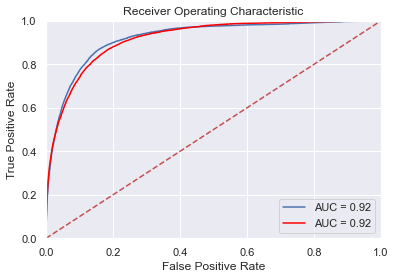

In [1767]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(xq)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

probs1 = xgb_f.predict_proba(xq)
preds1 = probs1[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y1_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### As a part of this project we have successfully built a model that will predict whether a user would be active or not in the future based on his current data.